In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings("ignore")

In [46]:
from sklearnex import patch_sklearn 

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df=pd.read_csv('merged_data.csv')

In [3]:
df.head()

,Title,Article,Category
0,India’s overall exports in July this year esti...,India’s overall exports in July this year are ...,Business
1,Gold up by Rs 95; Silver climbs Rs 160\n,Gold prices today (14 August 2023) rose by 95 ...,Business
2,Oil steadies as investors weigh concerns about...,Oil prices steadied today (14 August 2023) as ...,Business
3,"Sensex ends 79 points higher to settle at 65,4...",Key domestic benchmark indices ended flat toda...,Business
4,Rupee closes at Rs 82.94 against US dollar\n,"In the forex market, the rupee closed at 82 ru...",Business


In [4]:
df.columns

Index(['Title', 'Article', 'Category'], dtype='object')

In [5]:
df.shape

(7136, 3)

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(6113, 3)

In [8]:
df

,Title,Article,Category
0,India’s overall exports in July this year esti...,India’s overall exports in July this year are ...,Business
1,Gold up by Rs 95; Silver climbs Rs 160\n,Gold prices today (14 August 2023) rose by 95 ...,Business
2,Oil steadies as investors weigh concerns about...,Oil prices steadied today (14 August 2023) as ...,Business
3,"Sensex ends 79 points higher to settle at 65,4...",Key domestic benchmark indices ended flat toda...,Business
4,Rupee closes at Rs 82.94 against US dollar\n,"In the forex market, the rupee closed at 82 ru...",Business
...,...,...,...
7131,Tata to invest £4 bn to set up 1st gigafactory...,Tata Group on Wednesday announced its plan to ...,Technology
7132,Lawsuit accuses Twitter of targeting older sta...,A second lawsuit against Twitter in a week has...,Technology
7133,Studio shares AI-generated 'South Park' episod...,Fable Studios released a fake 'South Park' epi...,Technology
7134,"Ensure you don't promote vulgarity, abuse: Tha...",Information and Broadcasting Minister Anurag T...,Technology


In [9]:
for i, row in df.iterrows():
    soup = BeautifulSoup(row['Title'], 'html.parser')
    if soup.find():
        df.drop(i, inplace=True)

In [10]:
df.shape

(6020, 3)

In [11]:
df['Category'].value_counts()

Entertainment    1639
Politics         1307
Technology       1098
Business         1049
Sports            926
category            1
Name: Category, dtype: int64

In [12]:
print(df.isnull().sum())

Title          0
Article     1208
Category       0
dtype: int64


In [13]:
df.describe(include='all')


,Title,Article,Category
count,6020,4812,6020
unique,5649,4721,6
top,"Gold prices decline Rs 130, trades at Rs 58,84...",Rahul Gandhi was convicted and was given a two...,Entertainment
freq,21,2,1639


In [14]:
df = df[df['Category'] != 'category']


In [15]:
df['Category'].value_counts()

Entertainment    1639
Politics         1307
Technology       1098
Business         1049
Sports            926
Name: Category, dtype: int64

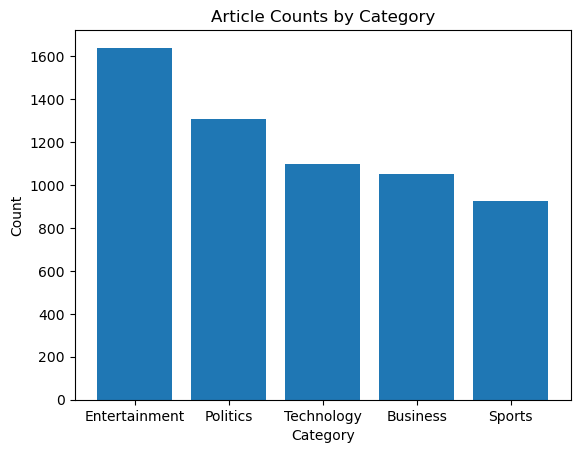

In [16]:
category_counts = df['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Article Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

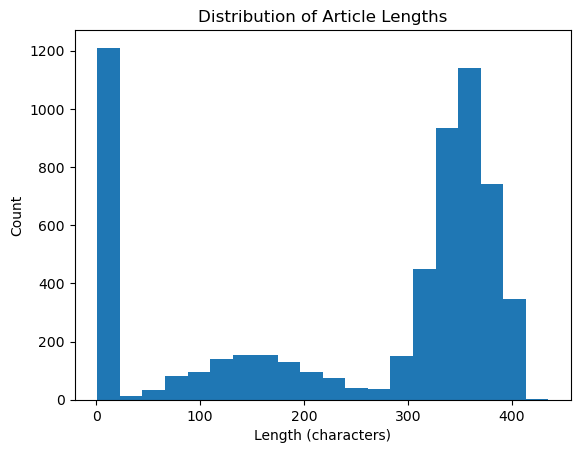

In [17]:
df['Article'] = df['Article'].astype(str)

plt.hist(df['Article'].apply(len), bins=20)
plt.title('Distribution of Article Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.show()


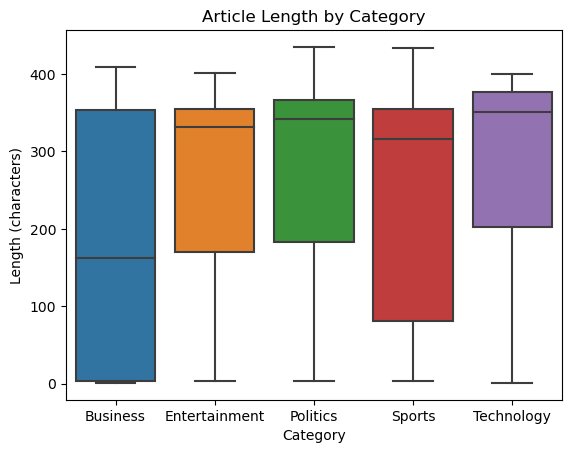

In [18]:
sns.boxplot(x='Category', y=df['Article'].apply(len), data=df)
plt.title('Article Length by Category')
plt.xlabel('Category')
plt.ylabel('Length (characters)')
plt.show()


In [19]:
df['Title']=df['Title'].str.strip()
df['Title'] = df['Title'].str.replace('\n', '')
df['Title'] = df['Title'].astype(str).apply(lambda x: re.sub(r"short by (.*)$", " ", x))
df['Article']=df['Article'].str.strip()
df['Article'] = df['Article'].str.replace("\n", "")


In [20]:
df.shape

(6019, 3)

In [21]:
df['Article'] = df['Article'].fillna('')

df['Text']=df['Title']+" "+df['Article']
df['Text']

0       India’s overall exports in July this year esti...
1       Gold up by Rs 95; Silver climbs Rs 160 Gold pr...
2       Oil steadies as investors weigh concerns about...
3       Sensex ends 79 points higher to settle at 65,4...
4       Rupee closes at Rs 82.94 against US dollar In ...
                              ...                        
7131    Tata to invest £4 bn to set up 1st gigafactory...
7132    Lawsuit accuses Twitter of targeting older sta...
7133    Studio shares AI-generated 'South Park' episod...
7134    Ensure you don't promote vulgarity, abuse: Tha...
7135    20% of Apple's 5-yr user growth to come from I...
Name: Text, Length: 6019, dtype: object

In [22]:
df.to_csv('cleaned.csv')

In [23]:
target_category = df['Category'].unique()
print(target_category)

['Business' 'Entertainment' 'Politics' 'Sports' 'Technology']


In [24]:
stop_words = set(stopwords.words('english'))
new_stop_words = ["said","india","nan","added"]
stop_words.update(new_stop_words)
# function to remove stopwords from a string
def remove_stopwords(text):
    filtered_words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# apply the function to the 'text' column of the dataframe
#df['text'] = df['text'].apply(remove_stopwords)

In [25]:
special_chars_pattern = r'[^a-zA-Z0-9\s]'
def remove_special_chars(text):
    return re.sub(special_chars_pattern, '', text)

In [26]:
def remove_numbers(input_string):
    output_string = re.sub(r'\d+', '', input_string)
    return output_string

In [27]:
def convert_lower(text):
    return text.lower()

In [28]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [29]:

def wordcloud_draw(dataset):

    wordcloud = WordCloud(stopwords = stop_words,background_color = 'white',width = 2500, height = 2500).generate(' '.join(dataset))
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [30]:
df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'] = df['Text'].apply(remove_special_chars)
df['Text'] = df['Text'].apply(remove_numbers)

df['Text'] = df['Text'].apply(convert_lower)
df['Text'] = df['Text'].apply(lemmatize_words)


business related words:


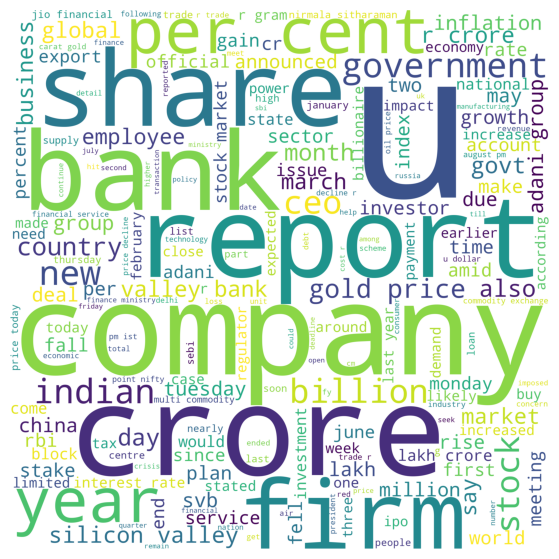

In [31]:
business = df[df['Category'] == 'Business']
business = business['Text']
print("business related words:")

wordcloud_draw(business)

Technology related words:


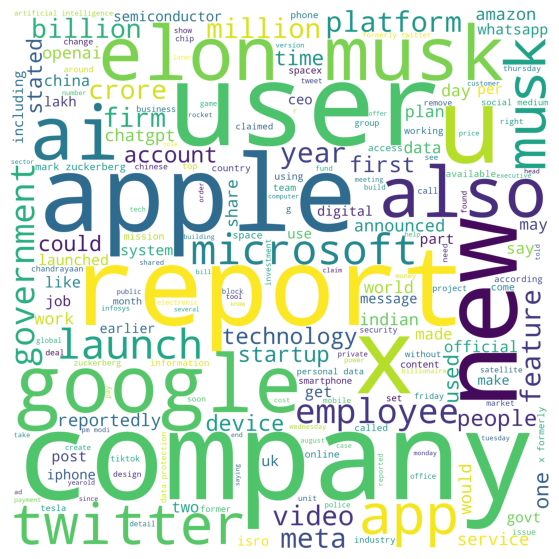

In [32]:
tech = df[df['Category'] == 'Technology']
tech = tech['Text']

print("Technology related words:")

wordcloud_draw(tech)

Sports related words:


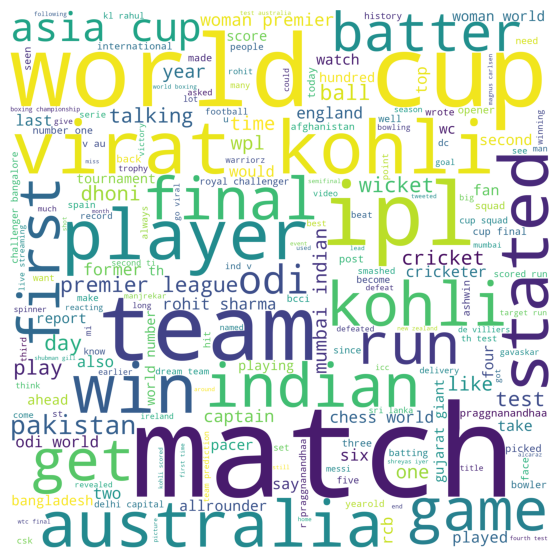

In [33]:
sports = df[df['Category'] == 'Sports']
sports = sports['Text']

print("Sports related words:")

wordcloud_draw(sports)

Entertainment related words:


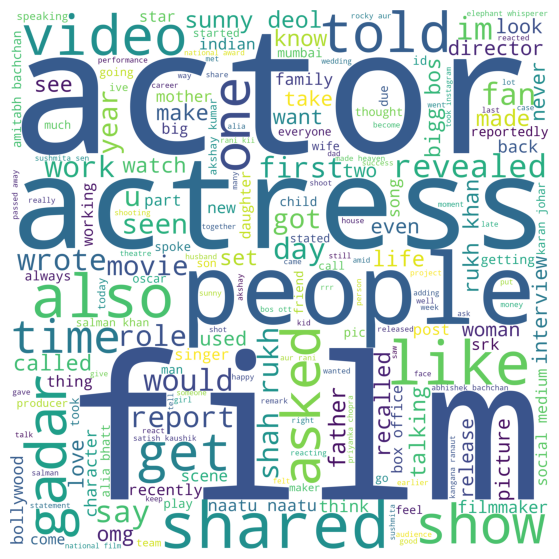

In [34]:
entertainment = df[df['Category'] == 'Entertainment']
entertainment = entertainment['Text']

print("Entertainment related words:")

wordcloud_draw(entertainment)

politics related words:


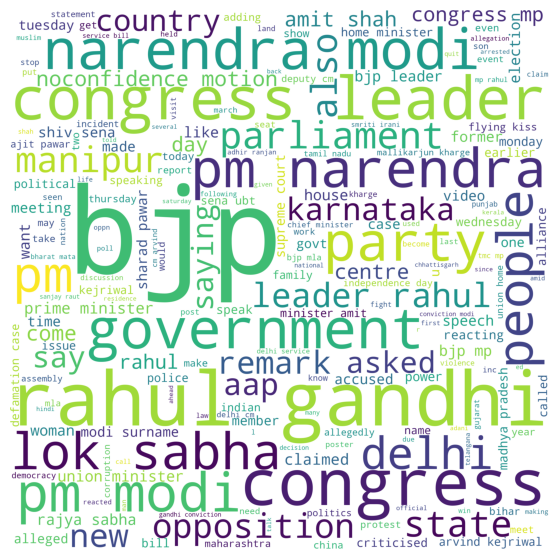

In [35]:
politics = df[df['Category'] == 'Politics']
politics = politics['Text']
print("politics related words:")

wordcloud_draw(politics)

In [36]:
df.head(10)

,Title,Article,Category,Text
0,India’s overall exports in July this year esti...,India’s overall exports in July this year are ...,Business,india overall export july year estimated billi...
1,Gold up by Rs 95; Silver climbs Rs 160,Gold prices today (14 August 2023) rose by 95 ...,Business,gold r silver climb r gold price today august ...
2,Oil steadies as investors weigh concerns about...,Oil prices steadied today (14 August 2023) as ...,Business,oil steady investor weigh concern china falter...
3,"Sensex ends 79 points higher to settle at 65,402",Key domestic benchmark indices ended flat toda...,Business,sensex end point higher settle key domestic be...
4,Rupee closes at Rs 82.94 against US dollar,"In the forex market, the rupee closed at 82 ru...",Business,rupee close r u dollar forex market rupee clos...
5,Centre to E-auction 50 Lakh MT of wheat and 25...,The Centre has decided to release 50 Lakh Metr...,Business,centre eauction lakh mt wheat lmt rice tame in...
6,Index of Industrial Production growth at 3.7 p...,The index of industrial production grew by 3.7...,Business,index industrial production growth percent jun...
7,Asian stock markets end in red; European Marke...,Asian stock markets today ended in red. China'...,Business,asian stock market end red european market als...
8,Wall Street's main indices end in green as inv...,Wall Street's main indices ended in green yest...,Business,wall street main index end green investor worr...
9,Forex Market: Rupee closes at 82.84 against US...,"In the forex market, the rupee closed at 82 ru...",Business,forex market rupee close u dollar forex market...


In [37]:
#declare dependent and independent value

x = df['Text']
y = df['Category']

In [38]:
#Create and Fit Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df.Text.values)
y = np.array(df.Category.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (6019, 5000)
y.shape =  (6019,)


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

4213
1806


In [40]:
#create list of model and accuracy dicts
perform_list = [ ]
def run_model(model_name, est_c, est_pnlty):
    mdl=''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))



In [41]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Logistic Regression: % 82.17
Precision : 0.8217054263565892
Recall : 0.8217054263565892
F1-score : 0.8217054263565892


In [42]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 84.33
Precision : 0.8433001107419712
Recall : 0.8433001107419712
F1-score : 0.8433001107419712


In [43]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 85.99
Precision : 0.8599114064230343
Recall : 0.8599114064230343
F1-score : 0.8599114064230343


In [44]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

KeyboardInterrupt: 

In [45]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 74.31
Precision : 0.743078626799557
Recall : 0.743078626799557
F1-score : 0.7430786267995572


In [47]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

KeyboardInterrupt: 

In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

In [ ]:
classifier = MultinomialNB();
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
y_pred1 = cv.transform(['Captains pose with IPL 2023 trophy at Narendra Modi Stadium, Rohit Sharma missing']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

In [ ]:
y_pred1 = cv.transform(['Which players have been ruled out of IPL 2023 that will begin tomorrow?']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

In [ ]:
y_pred1 = cv.transform(['Bard not trained using ChatGPT: Google on claims it copied OpenAI']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

In [ ]:
y_pred1 = cv.transform(['Makers of Prabhas Adipurush unveil new poster on Ram Navami']).toarray()
yy = classifier.predict(y_pred1)
print(yy)

In [ ]:
y_pred1 = cv.transform(['Ex-Haryana CM Bhupinder Hooda joins wrestlers protest in Delhi']).toarray()
yy = classifier.predict(y_pred1)
print(yy)